In [2]:
import pandas as pd
import numpy as np

# Output path helper function
from pathlib import Path
import os

def get_output_path(filename):
    """Get the correct output path based on file type"""
    base_path = Path('../../04_outputs')
    
    # Processed data files (should go to 01_data/processed)
    if any(x in filename.upper() for x in ['FINAL_', 'IBA_FAMILY', 'IBA_Fleet', 'merged_iba', 'market_tightness']):
        path = Path('../../01_data/processed') / filename
    # Predictions CSVs
    elif 'prediction' in filename.lower() or 'ensemble' in filename.lower():
        path = base_path / 'predictions' / filename
    # Metrics CSVs
    elif any(x in filename.lower() for x in ['metric', 'summary', 'quantile', 'winkler', 'segment']):
        path = base_path / 'metrics' / filename
    # Models (pkl files)
    elif filename.endswith('.pkl'):
        path = Path('../../03_models/saved_models') / filename
    # JSON mappings
    elif filename.endswith('.json'):
        path = Path('../../03_models/model_artifacts') / filename
    # Visualizations (all image files and html)
    elif filename.endswith(('.png', '.jpg', '.jpeg', '.gif', '.svg', '.html')):
        path = base_path / 'visualizations' / filename
    # Excel files - usually processed data
    elif filename.endswith('.xlsx'):
        path = Path('../../01_data/processed') / filename
    # Default to processed data for other CSVs
    elif filename.endswith('.csv'):
        path = Path('../../01_data/processed') / filename
    else:
        path = base_path / filename
    
    # Create directory if it doesn't exist
    path.parent.mkdir(parents=True, exist_ok=True)
    return path


In [3]:
data = pd.read_csv('../../01_data/processed/FINAL_merged_iba_data.csv')

In [4]:
data

,PN,year,month,Part Date,End User Companies,End User Inquiries,Non-End User Companies,Non-End User Inquiries,Total Sources,Total Quantity,...,IBA_age_15_25_count,IBA_age_15_25_share,IBA_age_25_plus_count,IBA_age_25_plus_share,IBA_share_owned,IBA_share_leased,IBA_share_operating_lease,IBA_share_finance_lease,IBA_share_gov_mil,IBA_share_commercial
0,019-012-001,2021,1,2021-01-01,10,12,33,60,77,236,...,182,0.135015,811,0.601632,0.773739,0.226261,0.167656,0.020772,0.09273,0.688427
1,019-012-001,2021,2,2021-02-01,5,7,45,106,76,222,...,182,0.135015,811,0.601632,0.773739,0.226261,0.167656,0.020772,0.09273,0.688427
2,019-012-001,2021,3,2021-03-01,4,5,15,43,74,216,...,182,0.135015,811,0.601632,0.773739,0.226261,0.167656,0.020772,0.09273,0.688427
3,019-012-001,2021,4,2021-04-01,9,12,42,106,69,201,...,182,0.135015,811,0.601632,0.773739,0.226261,0.167656,0.020772,0.09273,0.688427
4,019-012-001,2021,5,2021-05-01,6,7,33,88,71,198,...,182,0.135015,811,0.601632,0.773739,0.226261,0.167656,0.020772,0.09273,0.688427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27197,Z014H000333B,2025,6,2025-06-01,20,25,136,320,35,83,...,3113,0.242691,1358,0.105870,0.436189,0.563811,0.480861,0.034303,0.00460,0.872612
27198,Z014H000333B,2025,7,2025-07-01,33,57,189,455,37,90,...,3113,0.242691,1358,0.105870,0.436189,0.563811,0.480861,0.034303,0.00460,0.872612
27199,Z014H000333B,2025,8,2025-08-01,33,46,359,821,37,80,...,3113,0.242691,1358,0.105870,0.436189,0.563811,0.480861,0.034303,0.00460,0.872612
27200,Z014H000333B,2025,9,2025-09-01,18,28,148,329,37,84,...,3113,0.242691,1358,0.105870,0.436189,0.563811,0.480861,0.034303,0.00460,0.872612


In [5]:
# Display columns to understand the data structure
print("Available columns:")
print(data.columns.tolist())
print("\nData shape:", data.shape)
print("\nFirst few rows:")
data.head()

Available columns:
['PN', 'year', 'month', 'Part Date', 'End User Companies', 'End User Inquiries', 'Non-End User Companies', 'Non-End User Inquiries', 'Total Sources', 'Total Quantity', 'Quantity NE', 'Quantity NS', 'Quantity OH', 'Quantity SV', 'Quantity AR', 'entry_month', 'Demand_Type', 'ADI', 'CV²', 'P/N Type Code', 'P/N Application Code', 'Matched_AircraftFamily', 'IBA_fleet_count', 'IBA_age_mean', 'IBA_age_median', 'IBA_age_min', 'IBA_age_max', 'IBA_build_year_min', 'IBA_build_year_max', 'IBA_build_year_mean', 'IBA_order_year_min', 'IBA_order_year_max', 'IBA_order_year_mean', 'IBA_lease_start_year_median', 'IBA_num_operators', 'IBA_num_owners', 'IBA_num_countries_operated_for', 'IBA_age_0_8_count', 'IBA_age_0_8_share', 'IBA_age_8_15_count', 'IBA_age_8_15_share', 'IBA_age_15_20_count', 'IBA_age_15_20_share', 'IBA_age_20_30_count', 'IBA_age_20_30_share', 'IBA_age_30_plus_count', 'IBA_age_30_plus_share', 'IBA_age_15_25_count', 'IBA_age_15_25_share', 'IBA_age_25_plus_count', 'IBA_ag

,PN,year,month,Part Date,End User Companies,End User Inquiries,Non-End User Companies,Non-End User Inquiries,Total Sources,Total Quantity,...,IBA_age_15_25_count,IBA_age_15_25_share,IBA_age_25_plus_count,IBA_age_25_plus_share,IBA_share_owned,IBA_share_leased,IBA_share_operating_lease,IBA_share_finance_lease,IBA_share_gov_mil,IBA_share_commercial
0,019-012-001,2021,1,2021-01-01,10,12,33,60,77,236,...,182,0.135015,811,0.601632,0.773739,0.226261,0.167656,0.020772,0.09273,0.688427
1,019-012-001,2021,2,2021-02-01,5,7,45,106,76,222,...,182,0.135015,811,0.601632,0.773739,0.226261,0.167656,0.020772,0.09273,0.688427
2,019-012-001,2021,3,2021-03-01,4,5,15,43,74,216,...,182,0.135015,811,0.601632,0.773739,0.226261,0.167656,0.020772,0.09273,0.688427
3,019-012-001,2021,4,2021-04-01,9,12,42,106,69,201,...,182,0.135015,811,0.601632,0.773739,0.226261,0.167656,0.020772,0.09273,0.688427
4,019-012-001,2021,5,2021-05-01,6,7,33,88,71,198,...,182,0.135015,811,0.601632,0.773739,0.226261,0.167656,0.020772,0.09273,0.688427


In [6]:
# =====================================================================
# BASIC MARKET TIGHTNESS METRICS
# =====================================================================

# 1. BASIC MARKET TIGHTNESS - End User Companies
# High score = many end user companies looking for part, few sources (tight market)
data['market_tightness_eu'] = data['End User Companies'] / (data['Total Sources'] + 1)

# 2. BASIC MARKET TIGHTNESS - Non-End User Companies
# High score = many non-end user companies looking, few sources (tight market)
data['market_tightness_neu'] = data['Non-End User Companies'] / (data['Total Sources'] + 1)

# 3. COMBINED MARKET TIGHTNESS (Total Companies / Sources)
# Total demand pressure from both end users and non-end users
data['market_tightness_combined'] = (data['End User Companies'] + data['Non-End User Companies']) / (data['Total Sources'] + 1)

# =====================================================================
# END USER (EU) - EXCLUSIVE METRICS
# =====================================================================

# 4a. STOCK-ADJUSTED TENSION (EU ONLY)
# End user companies relative to available stock
data['stock_adjusted_tightness_eu'] = data['End User Companies'] / (data['Total Quantity'] + 1)

# 5a. RELATIVE MARKET TIGHTNESS EU (Z-Score approach)
# Compare EU tightness to its own historical average
data['avg_tightness_by_part_eu'] = data.groupby('PN')['market_tightness_eu'].transform(
    lambda x: x.expanding(min_periods=1).mean()
)
data['relative_market_tightness_eu'] = data['market_tightness_eu'] / (data['avg_tightness_by_part_eu'] + 0.001)

# 6a. MARKET SQUEEZE FLAG (EU ONLY)
# Using 75th percentile for EU companies and 25th percentile for sources as thresholds
inquiry_75_eu = data['End User Companies'].quantile(0.75)
sources_25 = data['Total Sources'].quantile(0.25)

data['is_market_squeeze_eu'] = np.where(
    (data['End User Companies'] > inquiry_75_eu) & 
    (data['Total Sources'] <= sources_25), 
    1, 
    0
)

# =====================================================================
# NON-END USER (NEU) - EXCLUSIVE METRICS
# =====================================================================

# 4b. STOCK-ADJUSTED TENSION (NEU ONLY)
# Non-end user companies relative to available stock
data['stock_adjusted_tightness_neu'] = data['Non-End User Companies'] / (data['Total Quantity'] + 1)

# 5b. RELATIVE MARKET TIGHTNESS NEU (Z-Score approach)
# Compare NEU tightness to its own historical average
data['avg_tightness_by_part_neu'] = data.groupby('PN')['market_tightness_neu'].transform(
    lambda x: x.expanding(min_periods=1).mean()
)
data['relative_market_tightness_neu'] = data['market_tightness_neu'] / (data['avg_tightness_by_part_neu'] + 0.001)

# 6b. MARKET SQUEEZE FLAG (NEU ONLY)
# Using 75th percentile for NEU companies and 25th percentile for sources as thresholds
inquiry_75_neu = data['Non-End User Companies'].quantile(0.75)

data['is_market_squeeze_neu'] = np.where(
    (data['Non-End User Companies'] > inquiry_75_neu) & 
    (data['Total Sources'] <= sources_25), 
    1, 
    0
)

# =====================================================================
# COMBINED METRICS (FOR REFERENCE)
# =====================================================================

# 4c. STOCK-ADJUSTED TENSION (COMBINED)
# Combined companies relative to available stock
data['stock_adjusted_tightness'] = (data['End User Companies'] + data['Non-End User Companies']) / (data['Total Quantity'] + 1)

# 5c. RELATIVE MARKET TIGHTNESS (COMBINED - Z-Score approach)
# Compare combined tightness to its own historical average
data['avg_tightness_by_part'] = data.groupby('PN')['market_tightness_combined'].transform(
    lambda x: x.expanding(min_periods=1).mean()
)
data['relative_market_tightness'] = data['market_tightness_combined'] / (data['avg_tightness_by_part'] + 0.001)

# 6c. MARKET SQUEEZE FLAG (COMBINED)
# Using 75th percentile for combined companies and 25th percentile for sources as thresholds
inquiry_75_combined = (data['End User Companies'] + data['Non-End User Companies']).quantile(0.75)

data['is_market_squeeze'] = np.where(
    (data['End User Companies'] + data['Non-End User Companies'] > inquiry_75_combined) & 
    (data['Total Sources'] <= sources_25), 
    1, 
    0
)

# =====================================================================
# ADDITIONAL METRICS
# =====================================================================

# 7. EU vs NEU RATIO
# What percentage of demand comes from end users?
data['eu_demand_ratio'] = data['End User Companies'] / (data['End User Companies'] + data['Non-End User Companies'] + 1)

# 8. SOURCE CONCENTRATION
# Average quantity per source (concentration of inventory)
data['qty_per_source'] = data['Total Quantity'] / (data['Total Sources'] + 1)

# 9. CREATE PROPER DATE COLUMN FROM YEAR AND MONTH
data['date'] = pd.to_datetime(data[['year', 'month']].assign(day=1))

print("Market Tightness Metrics Successfully Calculated!")
print("\nNew columns added:")
print("  - market_tightness_eu: End User company pressure")
print("  - market_tightness_neu: Non-End User company pressure")
print("  - market_tightness_combined: Combined company pressure")
print("  - stock_adjusted_tightness: Companies relative to actual quantity")
print("  - relative_market_tightness: Current vs historical tightness")
print("  - is_market_squeeze: Binary flag for supply squeeze conditions")
print("  - eu_demand_ratio: Proportion of demand from end users")
print("  - qty_per_source: Average inventory concentration per source")
print("  - date: DateTime column (YYYY-MM-DD format)")
print(f"\nThresholds used for squeeze detection:")
print(f"  - High company threshold (75%) EU: {inquiry_75_eu:.2f}")
print(f"  - High company threshold (75%) NEU: {inquiry_75_neu:.2f}")
print(f"  - Low sources threshold (25%): {sources_25:.0f}")

print("\n✓ Date column added successfully!")
print(f"\nDate column details:")
print(f"  • Column name: 'date'")
print(f"  • Format: YYYY-MM-DD")
print(f"  • Date range: {data['date'].min()} to {data['date'].max()}")
print(f"  • Number of unique dates: {data['date'].nunique()}")
print(f"\nSample of new metrics:")
data[['PN', 'year', 'month', 'date', 'End User Companies', 'market_tightness_combined']].head(10)

Market Tightness Metrics Successfully Calculated!

New columns added:
  - market_tightness_eu: End User company pressure
  - market_tightness_neu: Non-End User company pressure
  - market_tightness_combined: Combined company pressure
  - stock_adjusted_tightness: Companies relative to actual quantity
  - relative_market_tightness: Current vs historical tightness
  - is_market_squeeze: Binary flag for supply squeeze conditions
  - eu_demand_ratio: Proportion of demand from end users
  - qty_per_source: Average inventory concentration per source
  - date: DateTime column (YYYY-MM-DD format)

Thresholds used for squeeze detection:
  - High company threshold (75%) EU: 17.00
  - High company threshold (75%) NEU: 87.00
  - Low sources threshold (25%): 39

✓ Date column added successfully!

Date column details:
  • Column name: 'date'
  • Format: YYYY-MM-DD
  • Date range: 2021-01-01 00:00:00 to 2025-10-01 00:00:00
  • Number of unique dates: 58

Sample of new metrics:


,PN,year,month,date,End User Companies,market_tightness_combined
0,019-012-001,2021,1,2021-01-01,10,0.551282
1,019-012-001,2021,2,2021-02-01,5,0.649351
2,019-012-001,2021,3,2021-03-01,4,0.253333
3,019-012-001,2021,4,2021-04-01,9,0.728571
4,019-012-001,2021,5,2021-05-01,6,0.541667
5,019-012-001,2021,6,2021-06-01,6,0.597015
6,019-012-001,2021,7,2021-07-01,2,0.358209
7,019-012-001,2021,8,2021-08-01,4,0.492308
8,019-012-001,2021,9,2021-09-01,6,0.430769
9,019-012-001,2021,10,2021-10-01,10,0.507692


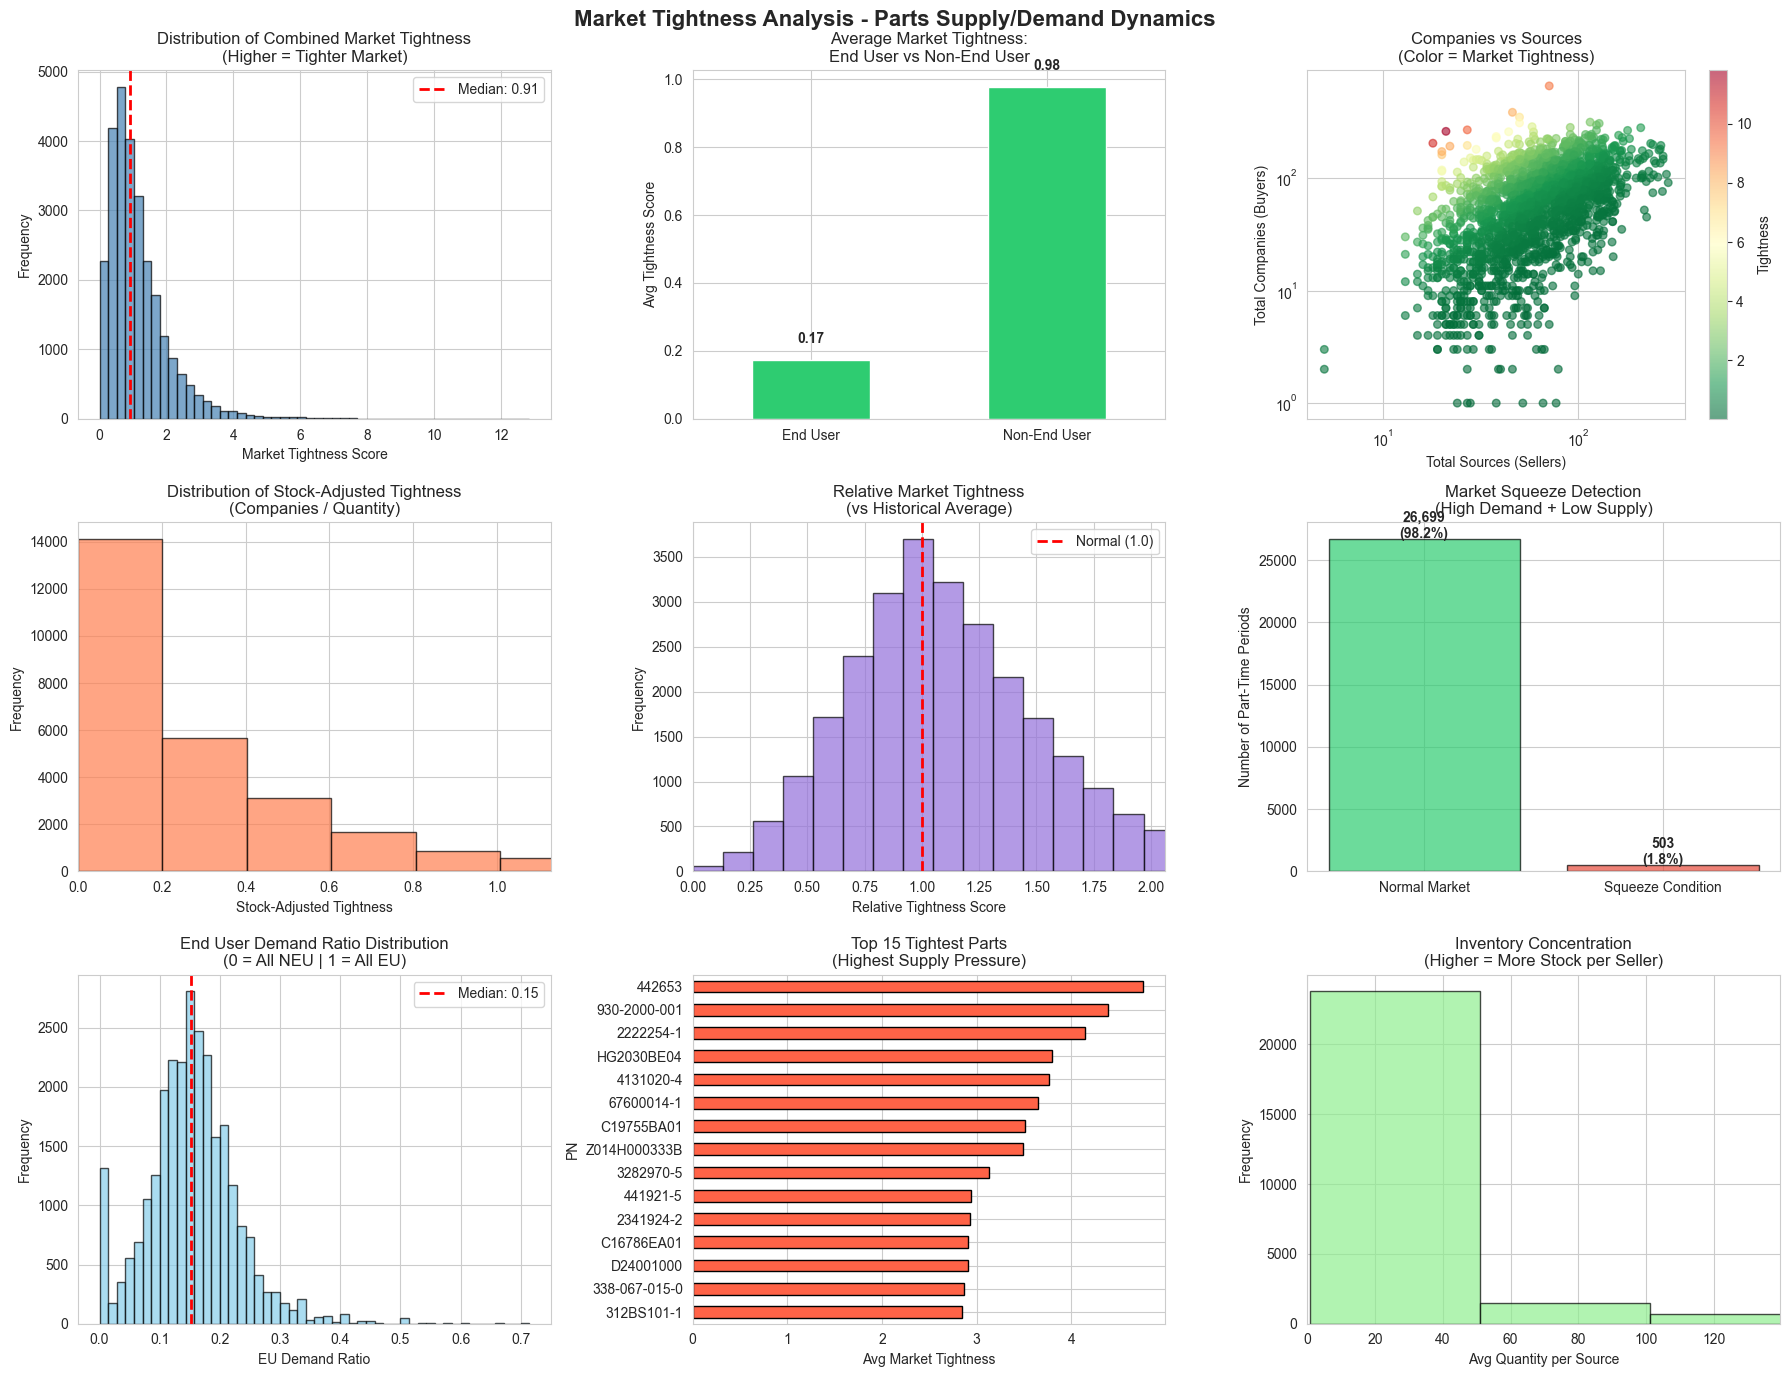

✓ Market Tightness Visualizations Complete!

Key Insights:
  • Average Market Tightness (Combined): 1.152
  • Median Market Tightness: 0.914
  • Parts in Market Squeeze: 503 (1.8%)
  • Average EU Demand Ratio: 15.3%
  • Average Stock per Source: 28.21 units


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking charts
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 12)

# Create a figure with multiple subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
fig.suptitle('Market Tightness Analysis - Parts Supply/Demand Dynamics', fontsize=16, fontweight='bold')

# 1. Distribution of Market Tightness (Combined)
axes[0, 0].hist(data['market_tightness_combined'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Market Tightness Score')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Combined Market Tightness\n(Higher = Tighter Market)')
axes[0, 0].axvline(data['market_tightness_combined'].median(), color='red', linestyle='--', linewidth=2, label=f'Median: {data["market_tightness_combined"].median():.2f}')
axes[0, 0].legend()

# 2. EU vs NEU Market Tightness Comparison
tightness_comparison = pd.DataFrame({
    'End User': [data['market_tightness_eu'].mean()],
    'Non-End User': [data['market_tightness_neu'].mean()]
})
tightness_comparison.T.plot(kind='bar', ax=axes[0, 1], color=['#2ecc71', '#e74c3c'], legend=False)
axes[0, 1].set_title('Average Market Tightness:\nEnd User vs Non-End User')
axes[0, 1].set_ylabel('Avg Tightness Score')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)
for i, v in enumerate(tightness_comparison.T[0]):
    axes[0, 1].text(i, v + 0.05, f'{v:.2f}', ha='center', fontweight='bold')

# 3. Companies vs Sources (Scatter)
sample_data = data.sample(n=min(2000, len(data)), random_state=42)
scatter = axes[0, 2].scatter(sample_data['Total Sources'], 
                              sample_data['End User Companies'] + sample_data['Non-End User Companies'],
                              c=sample_data['market_tightness_combined'], 
                              cmap='RdYlGn_r', alpha=0.6, s=30)
axes[0, 2].set_xlabel('Total Sources (Sellers)')
axes[0, 2].set_ylabel('Total Companies (Buyers)')
axes[0, 2].set_title('Companies vs Sources\n(Color = Market Tightness)')
plt.colorbar(scatter, ax=axes[0, 2], label='Tightness')
axes[0, 2].set_yscale('log')
axes[0, 2].set_xscale('log')

# 4. Stock-Adjusted Tightness Distribution
axes[1, 0].hist(data['stock_adjusted_tightness'], bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Stock-Adjusted Tightness')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Stock-Adjusted Tightness\n(Companies / Quantity)')
axes[1, 0].set_xlim(0, data['stock_adjusted_tightness'].quantile(0.95))

# 5. Relative Market Tightness (vs Historical)
axes[1, 1].hist(data['relative_market_tightness'], bins=50, color='mediumpurple', edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Relative Tightness Score')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].axvline(1.0, color='red', linestyle='--', linewidth=2, label='Normal (1.0)')
axes[1, 1].set_title('Relative Market Tightness\n(vs Historical Average)')
axes[1, 1].legend()
axes[1, 1].set_xlim(0, data['relative_market_tightness'].quantile(0.95))

# 6. Market Squeeze Flag Distribution
squeeze_counts = data['is_market_squeeze'].value_counts()
colors = ['#2ecc71', '#e74c3c']
axes[1, 2].bar(['Normal Market', 'Squeeze Condition'], 
               [squeeze_counts.get(0, 0), squeeze_counts.get(1, 0)],
               color=colors, edgecolor='black', alpha=0.7)
axes[1, 2].set_ylabel('Number of Part-Time Periods')
axes[1, 2].set_title('Market Squeeze Detection\n(High Demand + Low Supply)')
for i, v in enumerate([squeeze_counts.get(0, 0), squeeze_counts.get(1, 0)]):
    axes[1, 2].text(i, v + 100, f'{v:,}\n({100*v/len(data):.1f}%)', ha='center', fontweight='bold')

# 7. EU Demand Ratio Distribution
axes[2, 0].hist(data['eu_demand_ratio'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[2, 0].set_xlabel('EU Demand Ratio')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].set_title('End User Demand Ratio Distribution\n(0 = All NEU | 1 = All EU)')
axes[2, 0].axvline(data['eu_demand_ratio'].median(), color='red', linestyle='--', linewidth=2, label=f'Median: {data["eu_demand_ratio"].median():.2f}')
axes[2, 0].legend()

# 8. Top 15 Tightest Parts
top_tight = data.groupby('PN')[['market_tightness_combined', 'End User Companies', 'Total Sources']].agg({
    'market_tightness_combined': 'mean',
    'End User Companies': 'sum',
    'Total Sources': 'mean'
}).nlargest(15, 'market_tightness_combined')

top_tight['market_tightness_combined'].plot(kind='barh', ax=axes[2, 1], color='tomato', edgecolor='black')
axes[2, 1].set_xlabel('Avg Market Tightness')
axes[2, 1].set_title('Top 15 Tightest Parts\n(Highest Supply Pressure)')
axes[2, 1].invert_yaxis()

# 9. Quantity per Source (Inventory Concentration)
axes[2, 2].hist(data['qty_per_source'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[2, 2].set_xlabel('Avg Quantity per Source')
axes[2, 2].set_ylabel('Frequency')
axes[2, 2].set_title('Inventory Concentration\n(Higher = More Stock per Seller)')
axes[2, 2].set_xlim(0, data['qty_per_source'].quantile(0.95))

plt.tight_layout()
plt.show()

print("✓ Market Tightness Visualizations Complete!")
print(f"\nKey Insights:")
print(f"  • Average Market Tightness (Combined): {data['market_tightness_combined'].mean():.3f}")
print(f"  • Median Market Tightness: {data['market_tightness_combined'].median():.3f}")
print(f"  • Parts in Market Squeeze: {data['is_market_squeeze'].sum():,} ({100*data['is_market_squeeze'].mean():.1f}%)")
print(f"  • Average EU Demand Ratio: {data['eu_demand_ratio'].mean():.1%}")
print(f"  • Average Stock per Source: {data['qty_per_source'].mean():.2f} units")

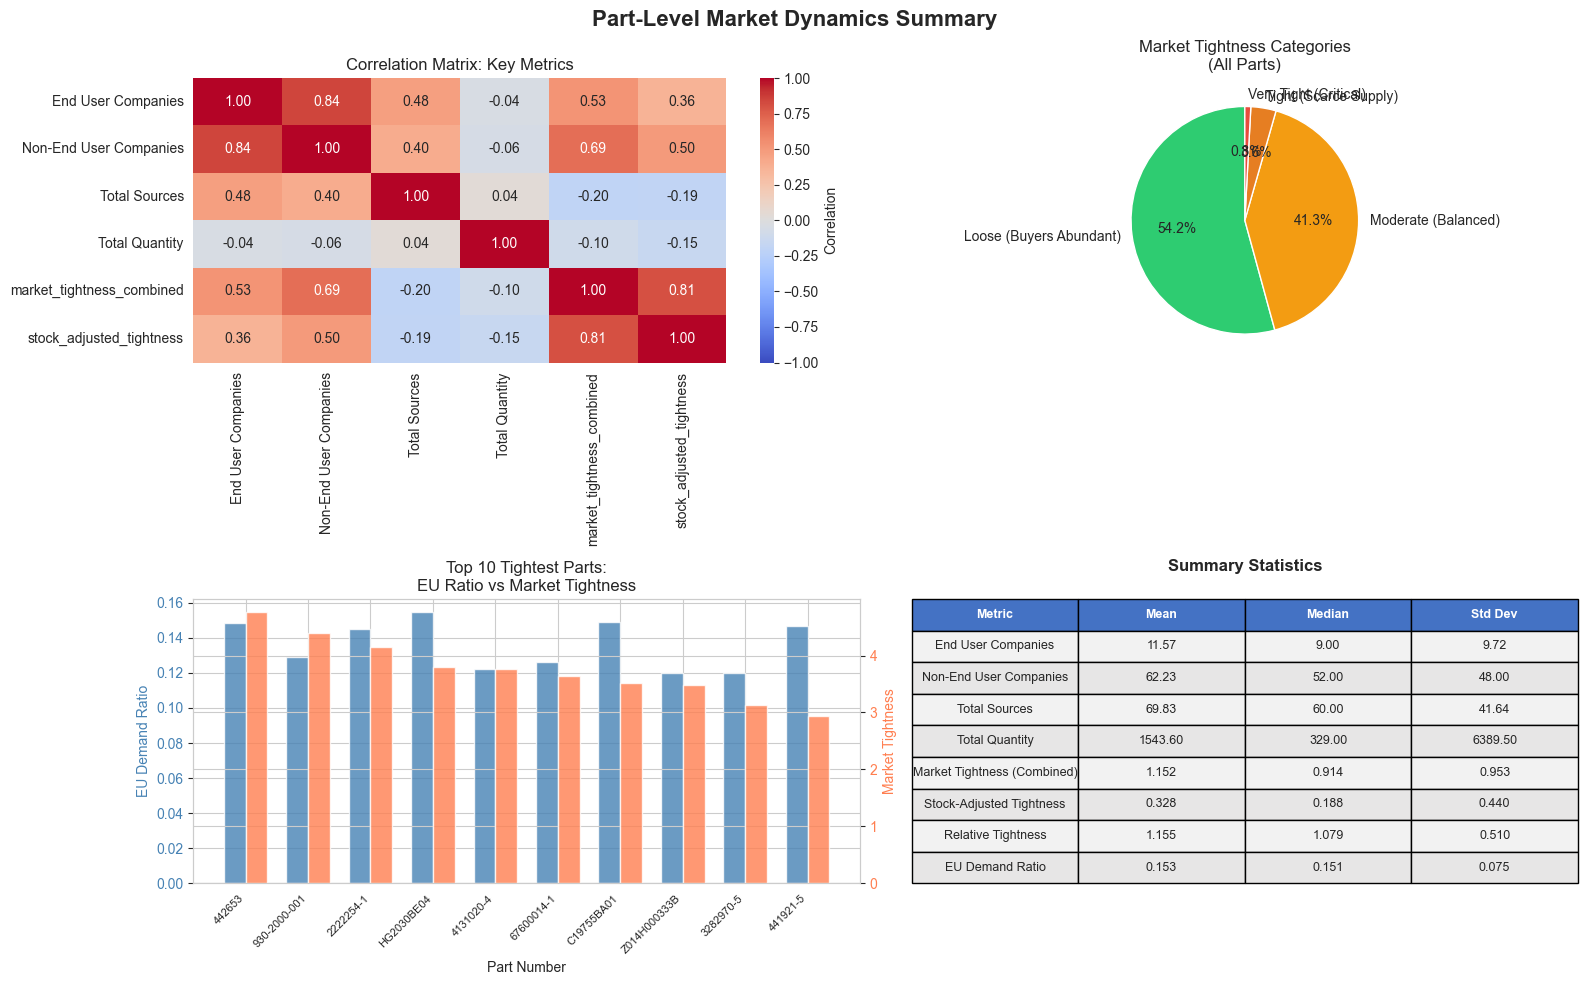


MARKET DYNAMICS SUMMARY

📊 MARKET COMPOSITION:
  • Total unique parts: 469
  • Total data records: 27,202
  • Time periods covered: 5 years

🔥 TIGHTNESS CATEGORIES:
  • Loose (Buyers Abundant): 14,757 (54.2%)
  • Moderate (Balanced): 11,243 (41.3%)
  • Tight (Scarce Supply): 973 (3.6%)
  • Very Tight (Critical): 229 (0.8%)

📈 DEMAND PATTERNS:
  • End User companies: 314,689 total
  • Non-End User companies: 1,692,832 total
  • Ratio (EU:NEU): 1 : 5.4

⚠️  CRITICAL SITUATIONS:
  • Parts in squeeze condition: 71 unique parts (1.8% of records)
  • 'Very Tight' market conditions: 224 records (0.8%)



In [8]:
import matplotlib.pyplot as plt

# Additional Analysis: Part-Level Summary Dashboard
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Part-Level Market Dynamics Summary', fontsize=16, fontweight='bold')

# 1. Correlation between key metrics
correlation_cols = ['End User Companies', 'Non-End User Companies', 'Total Sources', 
                    'Total Quantity', 'market_tightness_combined', 'stock_adjusted_tightness']
corr_matrix = data[correlation_cols].corr()

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            ax=axes[0, 0], cbar_kws={'label': 'Correlation'}, vmin=-1, vmax=1)
axes[0, 0].set_title('Correlation Matrix: Key Metrics')

# 2. Tightness Categories Distribution
def categorize_tightness(score):
    if score < 1.0:
        return 'Loose (Buyers Abundant)'
    elif score < 3.0:
        return 'Moderate (Balanced)'
    elif score < 5.0:
        return 'Tight (Scarce Supply)'
    else:
        return 'Very Tight (Critical)'

data['tightness_category'] = data['market_tightness_combined'].apply(categorize_tightness)
category_counts = data['tightness_category'].value_counts()
category_order = ['Loose (Buyers Abundant)', 'Moderate (Balanced)', 'Tight (Scarce Supply)', 'Very Tight (Critical)']
category_counts = category_counts.reindex([c for c in category_order if c in category_counts.index])

colors_cat = ['#2ecc71', '#f39c12', '#e67e22', '#e74c3c']
axes[0, 1].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%',
               colors=colors_cat[:len(category_counts)], startangle=90, textprops={'fontsize': 10})
axes[0, 1].set_title('Market Tightness Categories\n(All Parts)')

# 3. Top 10 Parts: Tightness vs EU/NEU Ratio
top_parts = data.groupby('PN').agg({
    'market_tightness_combined': 'mean',
    'eu_demand_ratio': 'mean',
    'End User Companies': 'sum',
    'Non-End User Companies': 'sum'
}).nlargest(10, 'market_tightness_combined')

x = range(len(top_parts))
width = 0.35
axes[1, 0].bar([i - width/2 for i in x], top_parts['eu_demand_ratio'], width, label='EU Ratio', color='steelblue', alpha=0.8)
ax2 = axes[1, 0].twinx()
ax2.bar([i + width/2 for i in x], top_parts['market_tightness_combined'], width, label='Tightness', color='coral', alpha=0.8)

axes[1, 0].set_xlabel('Part Number')
axes[1, 0].set_ylabel('EU Demand Ratio', color='steelblue')
ax2.set_ylabel('Market Tightness', color='coral')
axes[1, 0].set_title('Top 10 Tightest Parts:\nEU Ratio vs Market Tightness')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(top_parts.index, rotation=45, ha='right', fontsize=8)
axes[1, 0].tick_params(axis='y', labelcolor='steelblue')
ax2.tick_params(axis='y', labelcolor='coral')

# 4. Summary Statistics Table
summary_stats = pd.DataFrame({
    'Metric': ['End User Companies', 'Non-End User Companies', 'Total Sources', 'Total Quantity',
               'Market Tightness (Combined)', 'Stock-Adjusted Tightness', 'Relative Tightness', 'EU Demand Ratio'],
    'Mean': [
        f"{data['End User Companies'].mean():.2f}",
        f"{data['Non-End User Companies'].mean():.2f}",
        f"{data['Total Sources'].mean():.2f}",
        f"{data['Total Quantity'].mean():.2f}",
        f"{data['market_tightness_combined'].mean():.3f}",
        f"{data['stock_adjusted_tightness'].mean():.3f}",
        f"{data['relative_market_tightness'].mean():.3f}",
        f"{data['eu_demand_ratio'].mean():.3f}"
    ],
    'Median': [
        f"{data['End User Companies'].median():.2f}",
        f"{data['Non-End User Companies'].median():.2f}",
        f"{data['Total Sources'].median():.2f}",
        f"{data['Total Quantity'].median():.2f}",
        f"{data['market_tightness_combined'].median():.3f}",
        f"{data['stock_adjusted_tightness'].median():.3f}",
        f"{data['relative_market_tightness'].median():.3f}",
        f"{data['eu_demand_ratio'].median():.3f}"
    ],
    'Std Dev': [
        f"{data['End User Companies'].std():.2f}",
        f"{data['Non-End User Companies'].std():.2f}",
        f"{data['Total Sources'].std():.2f}",
        f"{data['Total Quantity'].std():.2f}",
        f"{data['market_tightness_combined'].std():.3f}",
        f"{data['stock_adjusted_tightness'].std():.3f}",
        f"{data['relative_market_tightness'].std():.3f}",
        f"{data['eu_demand_ratio'].std():.3f}"
    ]
})

axes[1, 1].axis('tight')
axes[1, 1].axis('off')
table = axes[1, 1].table(cellText=summary_stats.values, colLabels=summary_stats.columns,
                         cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)

# Style header row
for i in range(len(summary_stats.columns)):
    table[(0, i)].set_facecolor('#4472C4')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Alternate row colors
for i in range(1, len(summary_stats) + 1):
    for j in range(len(summary_stats.columns)):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#E7E6E6')
        else:
            table[(i, j)].set_facecolor('#F2F2F2')

axes[1, 1].set_title('Summary Statistics', pad=20, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("MARKET DYNAMICS SUMMARY")
print("="*60)
print(f"\n📊 MARKET COMPOSITION:")
print(f"  • Total unique parts: {data['PN'].nunique():,}")
print(f"  • Total data records: {len(data):,}")
print(f"  • Time periods covered: {data['year'].max() - data['year'].min() + 1} years")

print(f"\n🔥 TIGHTNESS CATEGORIES:")
for cat in category_order:
    if cat in category_counts.index:
        count = category_counts[cat]
        pct = 100 * count / len(data)
        print(f"  • {cat}: {count:,} ({pct:.1f}%)")

print(f"\n📈 DEMAND PATTERNS:")
print(f"  • End User companies: {data['End User Companies'].sum():,} total")
print(f"  • Non-End User companies: {data['Non-End User Companies'].sum():,} total")
print(f"  • Ratio (EU:NEU): 1 : {(data['Non-End User Companies'].sum() / (data['End User Companies'].sum() + 1)):.1f}")

print(f"\n⚠️  CRITICAL SITUATIONS:")
squeeze_parts = data[data['is_market_squeeze'] == 1]['PN'].nunique()
print(f"  • Parts in squeeze condition: {squeeze_parts:,} unique parts ({100*data['is_market_squeeze'].mean():.1f}% of records)")
very_tight = data[data['market_tightness_combined'] > 5.0].shape[0]
print(f"  • 'Very Tight' market conditions: {very_tight:,} records ({100*very_tight/len(data):.1f}%)")

print("\n" + "="*60)

In [9]:
# Verify EU and NEU metrics were created
eu_columns = [col for col in data.columns if '_eu' in col]
neu_columns = [col for col in data.columns if '_neu' in col]

print("="*70)
print("EU-EXCLUSIVE METRICS (End User only)")
print("="*70)
for col in sorted(eu_columns):
    print(f"  ✓ {col}")

print("\n" + "="*70)
print("NEU-EXCLUSIVE METRICS (Non-End User only)")
print("="*70)
for col in sorted(neu_columns):
    print(f"  ✓ {col}")

print("\n" + "="*70)
print("COMBINED METRICS (for reference)")
print("="*70)
combined_cols = ['market_tightness_combined', 'stock_adjusted_tightness', 
                 'relative_market_tightness', 'is_market_squeeze', 
                 'eu_demand_ratio', 'qty_per_source']
for col in combined_cols:
    if col in data.columns:
        print(f"  ✓ {col}")

print("\n" + "="*70)
print("SAMPLE COMPARISON: EU vs NEU tightness metrics")
print("="*70)
sample = data[['PN', 'End User Companies', 'Non-End User Companies', 
                'market_tightness_eu', 'market_tightness_neu', 'market_tightness_combined']].head(8)
print(sample.to_string())


EU-EXCLUSIVE METRICS (End User only)
  ✓ avg_tightness_by_part_eu
  ✓ is_market_squeeze_eu
  ✓ market_tightness_eu
  ✓ relative_market_tightness_eu
  ✓ stock_adjusted_tightness_eu

NEU-EXCLUSIVE METRICS (Non-End User only)
  ✓ avg_tightness_by_part_neu
  ✓ is_market_squeeze_neu
  ✓ market_tightness_neu
  ✓ relative_market_tightness_neu
  ✓ stock_adjusted_tightness_neu

COMBINED METRICS (for reference)
  ✓ market_tightness_combined
  ✓ stock_adjusted_tightness
  ✓ relative_market_tightness
  ✓ is_market_squeeze
  ✓ eu_demand_ratio
  ✓ qty_per_source

SAMPLE COMPARISON: EU vs NEU tightness metrics
            PN  End User Companies  Non-End User Companies  market_tightness_eu  market_tightness_neu  market_tightness_combined
0  019-012-001                  10                      33             0.128205              0.423077                   0.551282
1  019-012-001                   5                      45             0.064935              0.584416                   0.649351
2  019-012

In [10]:
# Show the structural differences between EU and NEU analysis
print("\n" + "="*80)
print("EU vs NEU METRICS: INDEPENDENT ANALYSIS STRUCTURE")
print("="*80)

# Statistics for EU metrics
print("\n📊 END USER (EU) - EXCLUSIVE METRICS STATISTICS")
print("-" * 80)
eu_stats = data[['market_tightness_eu', 'stock_adjusted_tightness_eu', 
                  'relative_market_tightness_eu', 'is_market_squeeze_eu']].describe()
print(eu_stats.to_string())

print("\n\n📊 NON-END USER (NEU) - EXCLUSIVE METRICS STATISTICS")
print("-" * 80)
neu_stats = data[['market_tightness_neu', 'stock_adjusted_tightness_neu', 
                   'relative_market_tightness_neu', 'is_market_squeeze_neu']].describe()
print(neu_stats.to_string())

print("\n\n" + "="*80)
print("KEY INSIGHTS: How EU and NEU Markets Differ")
print("="*80)
eu_squeeze = data['is_market_squeeze_eu'].sum()
neu_squeeze = data['is_market_squeeze_neu'].sum()
print(f"\n🔴 Parts in Market Squeeze (EU): {eu_squeeze:,} records ({eu_squeeze/len(data)*100:.1f}%)")
print(f"🔴 Parts in Market Squeeze (NEU): {neu_squeeze:,} records ({neu_squeeze/len(data)*100:.1f}%)")

print(f"\n📈 Average EU Market Tightness: {data['market_tightness_eu'].mean():.3f}")
print(f"📈 Average NEU Market Tightness: {data['market_tightness_neu'].mean():.3f}")

print(f"\n💾 Average EU Stock-Adjusted Tightness: {data['stock_adjusted_tightness_eu'].mean():.3f}")
print(f"💾 Average NEU Stock-Adjusted Tightness: {data['stock_adjusted_tightness_neu'].mean():.3f}")

print("\n✅ CHANGES SUCCESSFULLY APPLIED:")
print("   • EU metrics now calculated exclusively from End User Companies")
print("   • NEU metrics now calculated exclusively from Non-End User Companies")
print("   • Both track independently without cross-influence")
print("   • Combined metrics retained for reference/validation")



EU vs NEU METRICS: INDEPENDENT ANALYSIS STRUCTURE

📊 END USER (EU) - EXCLUSIVE METRICS STATISTICS
--------------------------------------------------------------------------------
       market_tightness_eu  stock_adjusted_tightness_eu  relative_market_tightness_eu  is_market_squeeze_eu
count         27202.000000                 27202.000000                  27202.000000          27202.000000
mean              0.174703                     0.049015                      1.122772              0.014999
std               0.150570                     0.066585                      0.651294              0.121550
min               0.000000                     0.000000                      0.000000              0.000000
25%               0.075000                     0.007359                      0.723176              0.000000
50%               0.140000                     0.028309                      1.037931              0.000000
75%               0.232759                     0.065598         

In [11]:
data.to_csv(get_output_path('FINAL_market_tightness_enhanced_data.csv'), index=False)